# Análisis y Visualización de Datos
## Trabajo práctico entregable - Grupo 30: Di Bartolo, Madriaga y Tula
---

### Índice de contenido:
* [Librerías externas](#Libs)
* [Ejercicio 2](#Ejercicio2)
    * [a) Densidad conjunta](#a)
    * [b) Asociación](#b)
    * [c) Densidad condicional](#c)
    * [d) Densidad conjunta condicional](#d)

#### Librerías externas <a class="anchor" id="Libs"></a>
---

Empezamos cargando librerías que vamos a usar en la resolución del ejercicio.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn
import math
import numpy as np

# Importamos también el dataframe tratado del Ejercicio 1
df_clean = pd.read_csv("clean.csv")

### Ejercicio 2 - Densidades y varias variables <a class="anchor" id="Ejercicio2"></a>

Responder a la pregunta general: **¿Qué herramientas (prácticas y teóricas) són útiles para explorar la base de datos, descubrir patrones, asociaciones?**

#### a) Densidad conjunta <a class="anchor" id="a"></a>

¿Qué herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. ¿Puede describir de alguna forma el comportamiento de sus datos? ¿Qué herramientas utilizaría? Describa.

---

Con el objetivo de estudiar la distribución y comportamiento de nuestros datos, emplearemos herramientas teórico-prácticas que nos brinda la **Estadística** y la **Probabilidad** tales como medidas de resumen, tablas y/o gráficos.

Cuando mencionamos medidas de resumen nos referimos a:

- La **media**, la cual desde un punto de vista aritmético corresponde a la suma de todas las observaciones dividido por el número total de datos.
- La **moda**, en cambio, es el valor cuya frecuencia relativa es mayor (valor mas repetido del conjunto de datos).
- La **mediana** es el valor del conjunto de datos tal que el 50% de los elementos son menores o iguales y el otro 50% son mayores o iguales.
- Los **cuartiles** son 4 porciones de datos que resultan de ordenar los datos y dividirlos en 4 conjuntos de igual cardinalidad. Se usan frecuentemente para tratar de forma diferenciada a grupos de observaciones.
- La **varianza** mide la dispersión de los datos respecto a la media. Numéricamente, corresponde a la media de los cuadrados de las distancias de todos los datos; se utiliza para cuantificar qué tan *centrados* estan los datos con respecto a la media.
- La **desviación estandar** es otra medida de dispersión de los datos respecto a la media. Numéricamente corresponde a la raiz cuadrada de la varianza. Uno de su usos es la detección de outliers.


En cuanto a las herramientas visuales podemos emplear de acuerdo al tipo de variable y comportamiento de nuestros datos:

- Histogramas.
- Gráfico de lineas.
- Gráfico circular (Torta).
- Dispersion.
- Barras horizontales.
- Boxplots o Diagramas de cajas.
- Diagramas de calor. 
- Entre otros.

Para la asociación de variables, si estas son categoricas empleamos las denominadas tablas de contingencia mientras que para las variables numericas empleamos la covarianza y correlacion.

Variables numéricas escogidas:

- **salary_monthly_BRUTO**: salario antes de impuestos que recibe el empleado.
- **salary_monthly_NETO**: salario luego de impuestos que recibe el empleado.
- **profile_age**: edad de quien responde la encuesta.

Variables categóricas escogidas:

- **profile_gender**: género que autopercibe quien responde la encuesta.
- **programming_language**: lenguaje de programación con el que trabaja quien responde la encuesta.

##### Análisis de variables numéricas
---

**salary_monthly_BRUTO**: Lo primero que podemos hacer es visualizar la distribución de esta variable usando un histograma y después ver las medidas de resumen.

<AxesSubplot:xlabel='Salario bruto mensual [AR$]', ylabel='Frecuencia'>

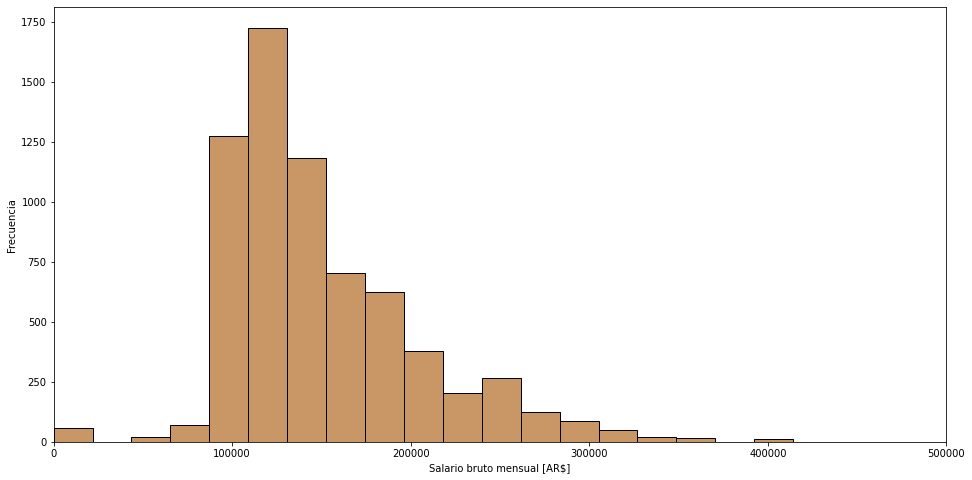

In [2]:
# Graficamos.
fig = plt.subplots(figsize=(16, 8))
plt.xlabel("Salario bruto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Frecuencia") # Renombraos el eje Y.
plt.xlim([0,500000])
seaborn.histplot(df_clean['salary_monthly_BRUTO'], bins=100, color='#B87333')

Al hacerlo notamos que hay algunos datos que parecen ser outliers y que deberíamos borrar de nuestro dataframe. Iterando vemos que quitando al 5% que menos gana y al 2% que más gana la distribución ya queda con una mejor forma.

count      6309.000000
mean     150713.976373
std       45010.291536
min       95100.000000
25%      117000.000000
50%      140000.000000
75%      176304.000000
max      299902.000000
Name: salary_monthly_BRUTO, dtype: float64

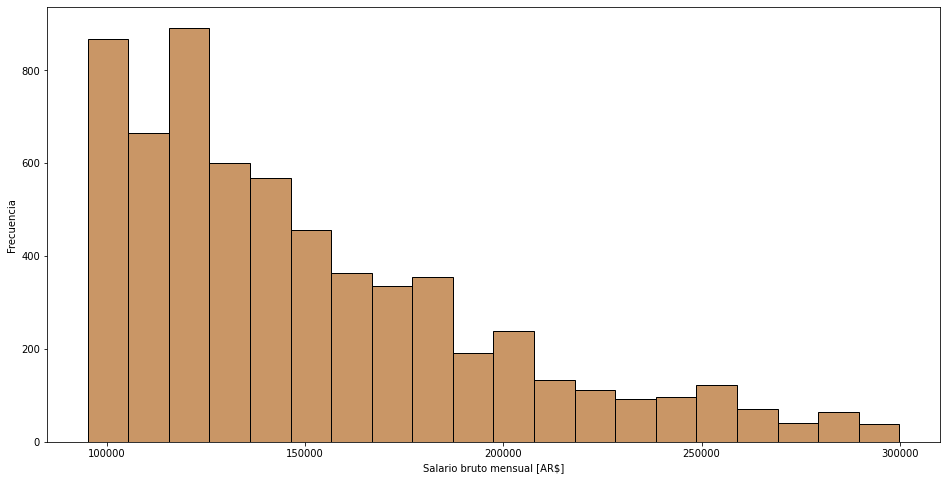

In [3]:
# Quitando al 5% que menos gana.
df_clean2 = df_clean[df_clean['salary_monthly_BRUTO'] > df_clean['salary_monthly_BRUTO'].quantile(5/100)]

# Quitando al 2% que más gana.
df_clean3 = df_clean2[df_clean2['salary_monthly_BRUTO'] < df_clean2['salary_monthly_BRUTO'].quantile(98/100)]

# Graficando una vez más.
fig = plt.subplots(figsize=(16, 8))
plt.xlabel("Salario bruto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Frecuencia") # Renombramos el eje Y.
#plt.xlim([0,500000])
seaborn.histplot(df_clean3['salary_monthly_BRUTO'], bins=20, color='#B87333')

# Medidas de resumen de los datos.
df_clean3["salary_monthly_BRUTO"].describe()

Se observa que:

- N: 6309 datos.
- Media: AR\$ 150.713
- Mediana: AR\$ 140.000
- Desviación estándar: AR$ 45.010

**salary_monthly_NETO**: visualicemos también el histograma y sus medidas de resumen.

count      6309.000000
mean     113139.557215
std       30243.835497
min       77407.100000
25%       90000.000000
50%      105000.000000
75%      128000.000000
max      237000.000000
Name: salary_monthly_NETO, dtype: float64

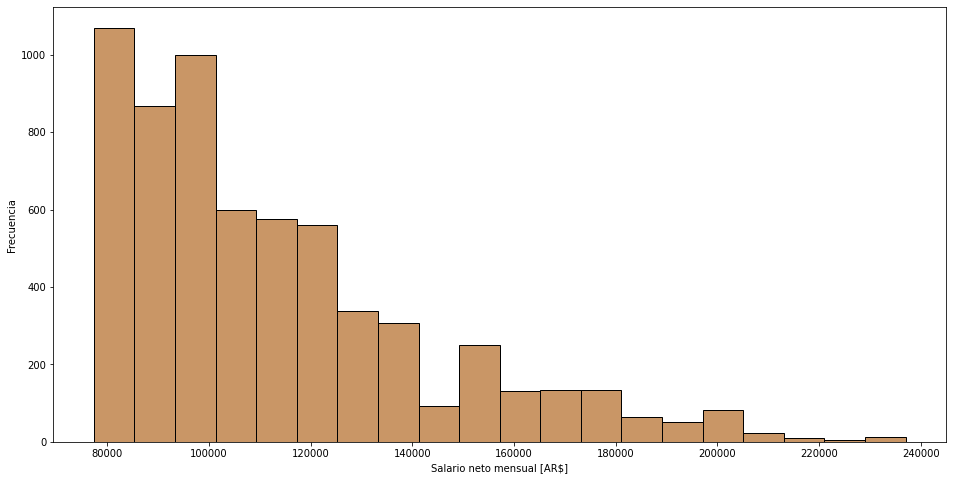

In [4]:
# Graficando una vez más.
fig = plt.subplots(figsize=(16, 8))
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Frecuencia") # Renombramos el eje Y.
#plt.xlim([0,500000])
seaborn.histplot(df_clean3['salary_monthly_NETO'], bins=20, color='#B87333')

# Medidas de resumen de los datos.
df_clean3["salary_monthly_NETO"].describe()

Se observa que:

- N: 6309 datos.
- Media: AR\$ 113.139
- Mediana: AR\$ 105.000
- Desviación estándar: AR$ 30.243

Pareciera que hay una dependencia con el salary_monthly_BRUTO ya que en todo es cierto \% más bajo, veamos qué pasa cuando juntamos ambas columnas.

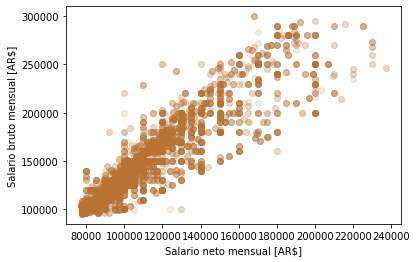

In [5]:
# Graficamos
plt.xlabel("Salario neto mensual [AR$]")
plt.ylabel("Salario bruto mensual [AR$]")
plt.scatter(df_clean3['salary_monthly_NETO'],df_clean3['salary_monthly_BRUTO'], color='#B87333', alpha=0.15)

Hay algo raro... Nunca el salario bruto puede ser estrictamente más bajo que el salario neto. Borraremos todos los datos que no cumplan esa condición ya que contienen un error (ya sea en el salario neto o el bruto).

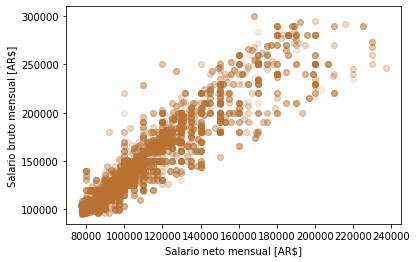

In [6]:
# Quitando irregularidades en la relación salario bruto/neto.
df_clean4 = df_clean3[df_clean3['salary_monthly_BRUTO'] > df_clean3['salary_monthly_NETO']]

# Graficamos
plt.xlabel("Salario neto mensual [AR$]")
plt.ylabel("Salario bruto mensual [AR$]")
plt.scatter(df_clean4['salary_monthly_NETO'],df_clean4['salary_monthly_BRUTO'], color='#B87333', alpha=0.15)

Evidentemente hay cierta proporcionalidad directa entre el salario bruto y el salario neto. Veamos cuál es esta correlación. 

Para eso vamos a usar la librería **numpy** y sus métodos para calcular:

- La matriz de varianza-covarianza **numpy.cov**: La matriz varianza–covarianza es una matriz cuadrada de dimensión nxm que recoge las varianzas en la diagonal principal y las covarianzas en los elementos de fuera de la diagonal principal.
- La matriz de correlaciones **numpy.corrcoef**: Muestra el coeficiente de correlación llamado r o la relación entre cada pareja en cada celda, expresada con un número que va desde 0 (no hay correlación) a 1 (correlación perfecta).

In [7]:
# Cálculo de la matriz de covarianza.
matcov=np.cov(df_clean4.salary_monthly_BRUTO,df_clean4.salary_monthly_NETO)
print('Matriz de varianza-covarianza:')
print("-----------------------------")
print("         BRUTO           NETO")
print("BRUTO |",round(matcov[0,0])," ",round(matcov[0,1]),"|")
print("NETO  |",round(matcov[1,0]),"  ",round(matcov[1,1]),"|")
print()
print()

# Cálculo de la matriz de correlaciones.
corr=np.corrcoef(df_clean4.salary_monthly_BRUTO,df_clean4.salary_monthly_NETO)
print('Matriz de correlaciones:')
print("------------------------")
print("       BRUTO  NETO")
print("BRUTO |",round(corr[0][0],2)," ",round(corr[0][1],2),"|")
print("NETO  |",round(corr[1][0],2),"",round(corr[1][1],2)," |")
print()
print('Correlación entra ambas variables: ',round(corr[0,1],2))

Matriz de varianza-covarianza:
-----------------------------
         BRUTO           NETO
BRUTO | 2050471154   1259144304 |
NETO  | 1259144304    894214038 |


Matriz de correlaciones:
------------------------
       BRUTO  NETO
BRUTO | 1.0   0.93 |
NETO  | 0.93  1.0  |

Correlación entra ambas variables:  0.93


De la matriz de varianza-covarianza vemos dos cosas:
- La varianza del salario bruto es mayor que la del salario neto.
- Las covarianzas son mayores a cero, por lo que cuando sube el salario neto también lo hace el bruto (la vuelta también es válida).

De la matriz de correlaciones vemos hay una correlación de 0.93 (alta) entre ambas variables.


**profile_age**: visualicemos también el histograma y sus medidas de resumen. Además veamos cómo se relaciona con, por ejemplo, el salario neto.

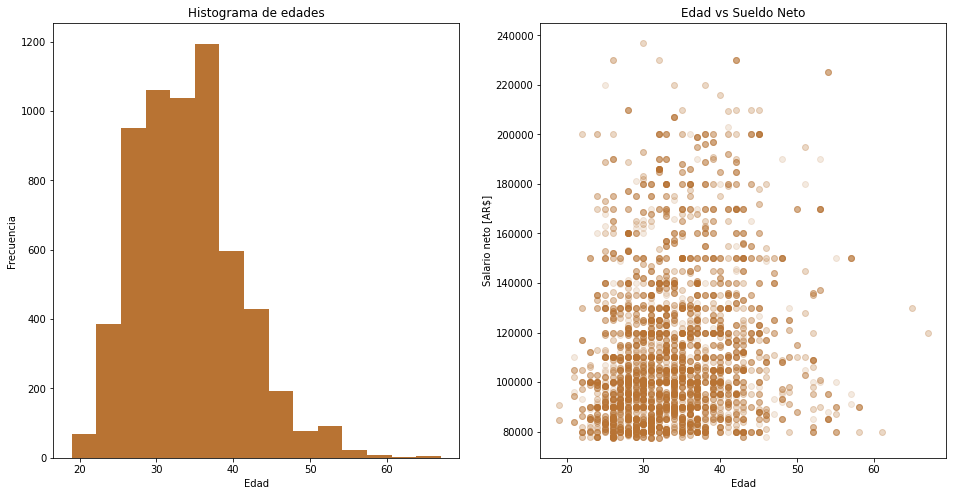

count    6128.000000
mean       33.937174
std         6.646631
min        19.000000
25%        29.000000
50%        33.000000
75%        38.000000
max        67.000000
Name: profile_age, dtype: float64


In [8]:
# Graficando una vez más.
fig, axs = plt.subplots(1,2, figsize=(16, 8))
axs[0].set(xlabel="Edad",ylabel="Frecuencia",title="Histograma de edades")
axs[0].hist(df_clean4['profile_age'], bins=15, color='#B87333')
axs[1].scatter(df_clean4["profile_age"],df_clean4["salary_monthly_NETO"],color='#B87333', alpha=0.15)
axs[1].set(xlabel="Edad",ylabel="Salario neto [AR$]", title="Edad vs Sueldo Neto")
plt.show()

# Medidas de resumen de los datos.
print(df_clean4["profile_age"].describe())

Se observa que:

- N: 6128 datos.
- Media: 34 años.
- Mediana: 33 años.
- Desviación estándar: 7 años.

En el gráfico de edad versus salario neto vemos que no hay una correlación aparente (mayor edad mayor sueldo, por ejemplo).

##### Análisis de variables categóricas
---

**profile_gender** y **programming_language**: veamos las proporciones de cada una de las variables y cómo se relacionan entre sí.

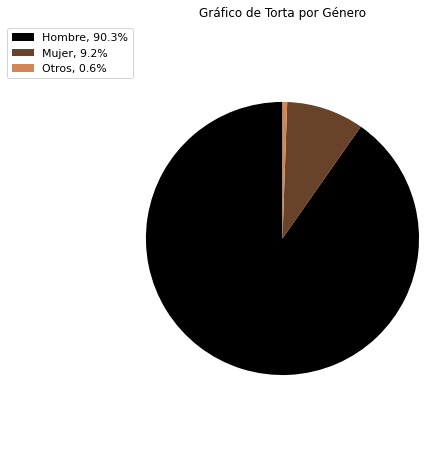

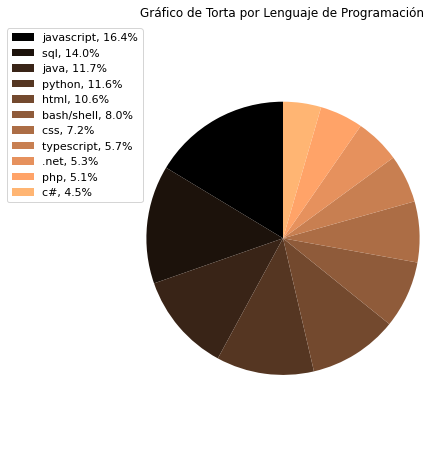

In [9]:
# Generamos un conteo de Hombres, Mujeres y Otros.
gender = df_clean4.profile_gender.value_counts().reset_index().rename(columns={'index': 'gender', 'profile_gender': 'frequency'})

# Graficamos.
sizes = gender['frequency']
labels = gender['gender']
 
fig1, ax1 = plt.subplots(figsize=(6, 6))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')

ax1.set(title="Gráfico de Torta por Género")
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

# Generamos un conteo de Hombres, Mujeres y Otros.
language = df_clean4.programming_language.value_counts().reset_index().rename(columns={'index': 'language', 'programming_language': 'frequency'})

# Graficamos.
sizes = language['frequency']
labels = language['language']
 
fig1, ax1 = plt.subplots(figsize=(6, 6))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')

ax1.set(title="Gráfico de Torta por Lenguaje de Programación")
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

En los gráficos de torta podemos ver como los hombres son el 90\% de la muestra y que los lenguajes JavaScript, SQL, Java y Python reúnen más del 50% de los casos.

De la tabla cruzada entre géneros y lenguajes de programación podemos determinar el numero de hombres y mujeres que emplean cada tipo de lenguaje de programación. Si la normalizamos encontramos la proporción de los casos cruzados (por ejemplo Hombre que utiliza Java tiene un 10,3\% de probabilidades de ocurrir).

In [10]:
# Creamos una tabla cruzada entre los géneros y los lenguajes de programación.
pd.crosstab(df_clean4.profile_gender, df_clean4.programming_language,margins=True, margins_name="Total",dropna=False)

programming_language,.net,bash/shell,c#,css,html,java,javascript,php,python,sql,typescript,Total
profile_gender,,,,,,,,,,,,
Hombre,301,462,254,377,570,654,900,290,645,756,323,5532
Mujer,24,21,21,60,73,61,97,24,59,97,25,562
Otros,1,5,1,4,4,4,5,0,4,5,1,34
Total,326,488,276,441,647,719,1002,314,708,858,349,6128


In [11]:
# Normalizada.
pd.crosstab(df_clean4.profile_gender, df_clean4.programming_language, margins=True, margins_name="Total",normalize=True,dropna=False)

programming_language,.net,bash/shell,c#,css,html,java,javascript,php,python,sql,typescript,Total
profile_gender,,,,,,,,,,,,
Hombre,0.049119,0.075392,0.041449,0.061521,0.093016,0.106723,0.146867,0.047324,0.105255,0.123368,0.052709,0.902742
Mujer,0.003916,0.003427,0.003427,0.009791,0.011913,0.009954,0.015829,0.003916,0.009628,0.015829,0.004080,0.091710
Otros,0.000163,0.000816,0.000163,0.000653,0.000653,0.000653,0.000816,0.000000,0.000653,0.000816,0.000163,0.005548
Total,0.053198,0.079634,0.045039,0.071965,0.105581,0.117330,0.163512,0.051240,0.115535,0.140013,0.056952,1.000000


De los siguientes **heatmaps** se desprende que:

- El lenguaje con el que más programan todos es JavaScript.
- El lenguaje con el que menos programan todos es C#.

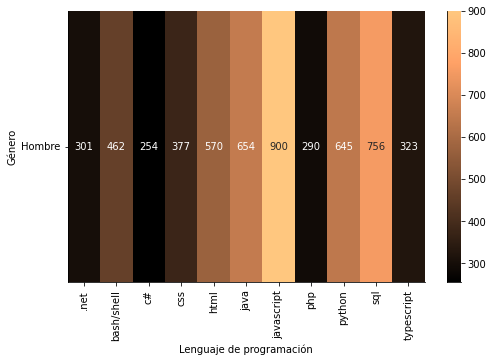

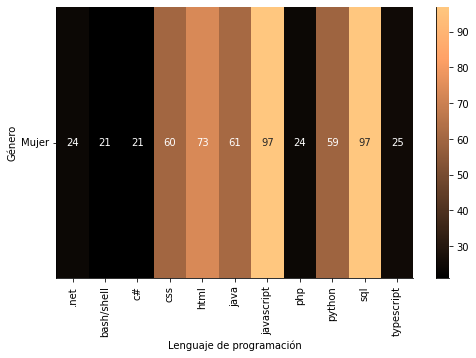

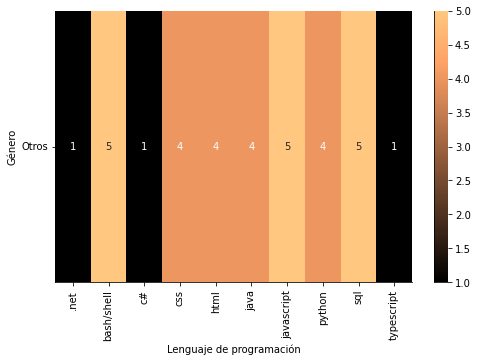

In [12]:
fig = plt.figure(figsize=(8,5))
exp = pd.crosstab(df_clean4[df_clean4["profile_gender"] == "Hombre"].profile_gender,
                  df_clean4.programming_language)
seaborn.heatmap(exp, annot=True, fmt='g', cmap="copper")
plt.xlabel("Lenguaje de programación")
plt.ylabel("Género")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
seaborn.despine()
plt.show()

fig = plt.figure(figsize=(8,5))
exp = pd.crosstab(df_clean4[df_clean4["profile_gender"] == "Mujer"].profile_gender,
                  df_clean4.programming_language)
seaborn.heatmap(exp, annot=True, fmt='g', cmap="copper")
plt.xlabel("Lenguaje de programación")
plt.ylabel("Género")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
seaborn.despine()
plt.show()

fig = plt.figure(figsize=(8,5))
exp = pd.crosstab(df_clean4[df_clean4["profile_gender"] == "Otros"].profile_gender,
                  df_clean4.programming_language)
seaborn.heatmap(exp, annot=True, fmt='g', cmap="copper")
plt.xlabel("Lenguaje de programación")
plt.ylabel("Género")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
seaborn.despine()
plt.show()

#### b) Asociación <a class="anchor" id="b"></a>

Necesitamos decidir si sacar o no la columna de salario bruto para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? ¿Qué abordaje y medidas usaría?

Tal y como se hizo anteriormente en el punto a) vemos que hay una alta correlación lineal entre salario bruto y neto.

Matriz de varianza-covarianza:
-----------------------------
         BRUTO           NETO
BRUTO | 2050471154   1259144304 |
NETO  | 1259144304    894214038 |


Matriz de correlaciones:
------------------------
       BRUTO  NETO
BRUTO | 1.0   0.93 |
NETO  | 0.93  1.0  |

Correlación entra ambas variables:  0.93


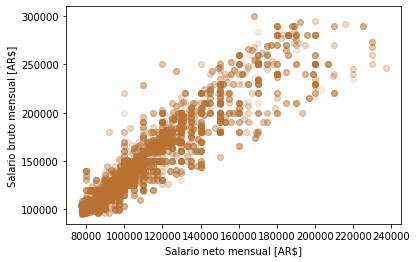

In [13]:
# Cálculo de la matriz de covarianza.
matcov=np.cov(df_clean4.salary_monthly_BRUTO,df_clean4.salary_monthly_NETO)
print('Matriz de varianza-covarianza:')
print("-----------------------------")
print("         BRUTO           NETO")
print("BRUTO |",round(matcov[0,0])," ",round(matcov[0,1]),"|")
print("NETO  |",round(matcov[1,0]),"  ",round(matcov[1,1]),"|")
print()
print()

# Cálculo de la matriz de correlaciones.
corr=np.corrcoef(df_clean4.salary_monthly_BRUTO,df_clean4.salary_monthly_NETO)
print('Matriz de correlaciones:')
print("------------------------")
print("       BRUTO  NETO")
print("BRUTO |",round(corr[0][0],2)," ",round(corr[0][1],2),"|")
print("NETO  |",round(corr[1][0],2),"",round(corr[1][1],2)," |")
print()
print('Correlación entra ambas variables: ',round(corr[0,1],2))

# Graficamos
plt.xlabel("Salario neto mensual [AR$]")
plt.ylabel("Salario bruto mensual [AR$]")
plt.scatter(df_clean4['salary_monthly_NETO'],df_clean4['salary_monthly_BRUTO'], color='#B87333', alpha=0.15)
plt.show()

Obtengamos por regresión lineal la relación entre los salarios (usando la librería **numpy**):

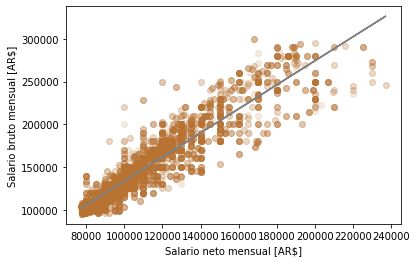

Ordenada al origen b: -7171.61
Pendiente m: 1.41


In [14]:
m, b = np.polyfit(df_clean4["salary_monthly_NETO"], df_clean4["salary_monthly_BRUTO"], 1)

# Graficamos
plt.xlabel("Salario neto mensual [AR$]")
plt.ylabel("Salario bruto mensual [AR$]")
plt.scatter(df_clean4['salary_monthly_NETO'],df_clean4['salary_monthly_BRUTO'], color='#B87333', alpha=0.15)
plt.plot(df_clean4['salary_monthly_NETO'], m*df_clean4['salary_monthly_NETO']+b, color="grey")
plt.show()

print("Ordenada al origen b:",round(b,2))
print("Pendiente m:",round(m,2))

Entonces, la ecuación para obtener el salario bruto a partir del neto es la siguiente:

$$
Salario Bruto = -7171,61 + 1.41 * Salario Neto
$$

#### c) Densidad condicional <a class="anchor" id="c"></a>

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación.

Como primera instancia se realizará una gráfica de torta para estudiar la distribución del nivel de estudio.

In [15]:
df_clean4.columns

Index(['Unnamed: 0', 'programming_language', 'profile_gender', 'profile_age',
       'profile_studies_level', 'salary_monthly_NETO', 'salary_monthly_BRUTO',
       'tools_programming_languages', 'cured_programming_languages',
       'profile_age_label', 'profile_studies_label'],
      dtype='object')

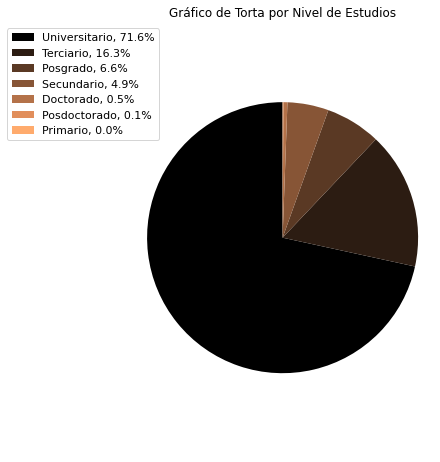

In [16]:
studies = df_clean4.profile_studies_level.value_counts().reset_index().rename(columns={'index': 'level', 'profile_studies_level': 'frequency'})

# Graficamos.
sizes = studies['frequency']
labels = studies['level']
 
fig1, ax1 = plt.subplots(figsize=(6, 6))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')

ax1.set(title="Gráfico de Torta por Nivel de Estudios")
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

Las dos subpoblaciones elegidas son: 
- Universitarios: 71.6\%
- Terciarios: 16.3\%

A continuación crearemos 2 dataframes con los registros correspondiente a cada sub-población,graficaremos los histogramas correspondientes y calcularemos las medidas de centralización y disperción:

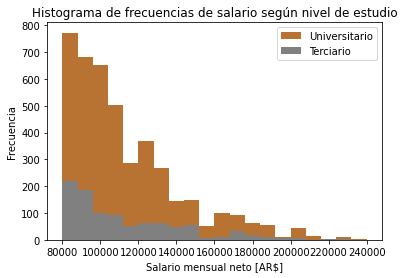

Medidas de centralización y dispersión: Universitario
-----------------------------------------------------
Cantidad de datos: 4387
Media: 111684.39
Mediana: 103000.00
Desviación estándar: 29146.42


Medidas de centralización y dispersión: Terciario
-------------------------------------------------
Cantidad de datos: 1001
Media: 110998.95
Mediana: 100000.00
Desviación estándar: 29865.12


In [17]:
# Creación de dataframes.
df_u= df_clean4[df_clean4['profile_studies_level']=='Universitario']
df_t= df_clean4[df_clean4['profile_studies_level']=='Terciario']

# Histogramas!
plt.xlabel("Salario mensual neto [AR$]")
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencias de salario según nivel de estudio")
plt.hist(df_u['salary_monthly_NETO'], color='#B87333', bins=20, range=(80000,240000), label="Universitario" )
plt.hist(df_t['salary_monthly_NETO'], color='grey', bins=20, range=(80000,240000), label="Terciario" )
plt.legend()
plt.show()

print("Medidas de centralización y dispersión: Universitario")
print("-----------------------------------------------------")
print("Cantidad de datos:",df_u['salary_monthly_NETO'].describe().apply(lambda s: '{0:.0f}'.format(s))[0])
print("Media:",df_u['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))[1])
print("Mediana:",df_u['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))[5])
print("Desviación estándar:",df_u['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))[2])
print()
print()
print("Medidas de centralización y dispersión: Terciario")
print("-------------------------------------------------")
print("Cantidad de datos:",df_t['salary_monthly_NETO'].describe().apply(lambda s: '{0:.0f}'.format(s))[0])
print("Media:",df_t['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))[1])
print("Mediana:",df_t['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))[5])
print("Desviación estándar:",df_t['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))[2])

Para ver si hay una relación entre el nivel de estudio, la edad y el sueldo neto podemos hacer un gráfico de dispersión con distintos colores.

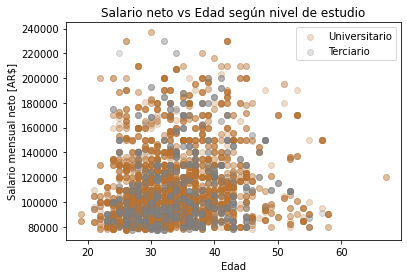

In [18]:
# Graficamos.
plt.title("Salario neto vs Edad según nivel de estudio")
plt.xlabel("Edad")
plt.ylabel("Salario mensual neto [AR$]")
plt.scatter(df_u["profile_age"],df_u["salary_monthly_NETO"],color="#B87333",label="Universitario",alpha=0.25)
plt.scatter(df_t["profile_age"],df_t["salary_monthly_NETO"],color="grey",label="Terciario",alpha=0.25)
plt.legend()
plt.show()

Como no se puede observar una diferencia clara en la nube de puntos vamos a hacer regresión lineal y comparar las rectas:

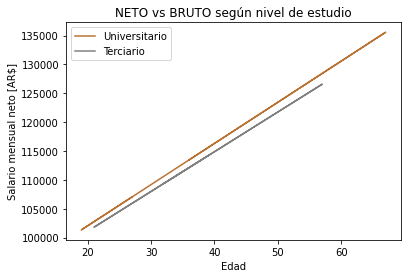

In [19]:
m_u, b_u = np.polyfit(df_u["profile_age"], df_u["salary_monthly_NETO"], 1)
m_t, b_t = np.polyfit(df_t["profile_age"], df_t["salary_monthly_NETO"], 1)

plt.title("NETO vs BRUTO según nivel de estudio")
plt.xlabel("Edad")
plt.ylabel("Salario mensual neto [AR$]")
plt.plot(df_u['profile_age'], m_u*df_u['profile_age']+b_u, color="#B87333",label="Universitario")
plt.plot(df_t['profile_age'], m_t*df_t['profile_age']+b_t, color="grey",label="Terciario")
plt.legend()
plt.show()

Se puede ver que tener un título universitario ayuda, ligeramente, a tener un mayor sueldo.

#### d) Densidad conjunta condicional <a class="anchor" id="d"></a>

Elija dos variables numéricas y una categórica. 

Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn).

<AxesSubplot:xlabel='profile_age', ylabel='salary_monthly_NETO'>

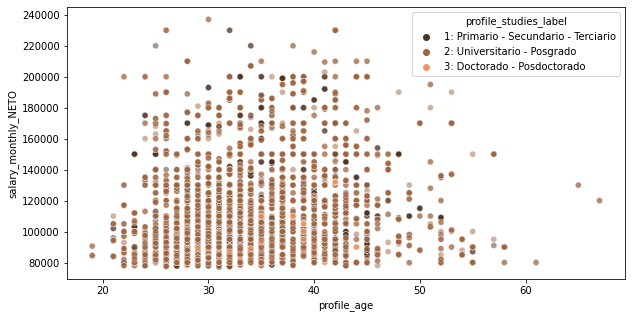

In [20]:
plt.figure(figsize=(10,5))
seaborn.scatterplot(data=df_clean4, x="profile_age", y="salary_monthly_NETO", hue="profile_studies_label", palette="copper", alpha=0.5)

Una vez más, por último vamos a exportar el dataframe limpio para usarlo en próximos notebooks.

In [21]:
df_clean4.to_csv("clean2.csv")